In [2]:
from pysr import PySRRegressor
import numpy as np
import rsciio.digitalmicrograph as dm
import matplotlib.pyplot as plt

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [ ]:
class SREELS:
    def __init__(self):
        self.core_loss_data = None
        self.energy_loss_axis = None
        self.spatial_axis = None

        self.single_eels_spectrum = None
        self.windowed_energy_loss_axis = None

        self.model = None
        self.best_expression = None
    def read_data(self, filename):

        raw_data = dm.file_reader(filename)
        self.core_loss_data = raw_data[0]['data'][:500,:]

        energy_loss_md = raw_data[0]['axes'][1]
        begin, dispersion, size = energy_loss_md['offset'], energy_loss_md['scale'], energy_loss_md['size']
        self.energy_loss_axis = np.linspace(begin, begin + dispersion * (size - 1), size)

        spatial_md = raw_data[0]['axes'][0]
        begin, step, size = spatial_md['offset'], spatial_md['scale'], spatial_md['size']
        self.spatial_axis = np.linspace(begin, begin + step * (size - 1), size)

    def plot_data(self):
        plt.imshow(self.core_loss_data, aspect='auto', 
                   extent=[self.energy_loss_axis[0], self.energy_loss_axis[-1], 
                           0, len(self.spatial_axis)], cmap='viridis')
        plt.colorbar(label='Intensity')
        plt.ylabel('Spectrum index')
        plt.xlabel('Energy Loss Axis')
        plt.title('Core Loss Data')
    
    def choose_data(self, spectral_index, lower, higher):
        if self.core_loss_data is None:
            raise ValueError("No data loaded. Call read_data() first.")
        window = (self.energy_loss_axis >= lower) & (self.energy_loss_axis <= higher)
        self.single_eels_spectrum = self.core_loss_data[spectral_index, window]
        self.windowed_energy_loss_axis = self.energy_loss_axis[window]

    def define_model(self, iterations, unary_operators, binary_operators):
        self.model = PySRRegressor(
            niterations=iterations,
            binary_operators=binary_operators,
            unary_operators=unary_operators,
            loss="loss(x, y) = (x - y)^2",
            model_selection="best",
            constraints={"pow": (9, 1)},
            maxdepth=5,
            )

    def train_model(self, interval):
        if self.model is None:
            raise ValueError("Model not defined. Call define_model() first.")
        self.model.fit(self.windowed_energy_loss_axis[interval].reshape(-1, 1), 
                       self.single_eels_spectrum[interval])
        self.best_expression = self.model.get_best()
    
    def plot_model(self):
        plt.plot(self.windowed_energy_loss_axis, 
                 self.single_eels_spectrum, 
                 label='Data')
        plt.plot(self.windowed_energy_loss_axis, 
                 self.model.predict(self.windowed_energy_loss_axis.reshape(-1, 1)), 
                 label='Model {}'.format(self.model.sympy()), linestyle='--')
        plt.xlabel('Energy Loss Axis')
        plt.ylabel('Intensity')
        plt.title('Model Fit')
        plt.legend()
        plt.tight_layout()
        plt.show()



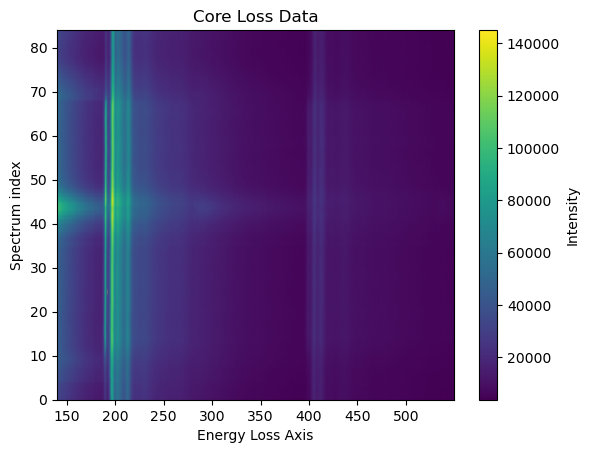

In [6]:
symreg = SREELS()
path_to_data = "../data/008_core_loss_line_020evpx_1mm.dm3"
symreg.read_data(path_to_data)
symreg.plot_data()

c:\Users\bartv\miniconda3\Lib\site-packages\pysr\sr.py:1017: FutureWarning: `loss` has been renamed to `elementwise_loss` in PySRRegressor. Please use that instead.
  warnings.warn(
c:\Users\bartv\miniconda3\Lib\site-packages\pysr\sr.py:2776: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
c:\Users\bartv\miniconda3\Lib\site-packages\pysr\sr.py:89: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://ai.damtp.cam.ac.uk/pysr/tuning/
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.200e+05
Progress: 578 / 31000 total iterations (1.865%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           7.314e+07  1.594e+01  y = 15810
3           7.234e+07  5.501e-03  y = 16114 - x₀
5           6.098e+06  1.237e+00  y = (x₀ * -167.05) + 66726
7           6.097e+06  7.484e-05  y = ((x₀ * -167.41) + 66726) ^ 1.0006
9           4.678e+05  1.284e+00  y = ((-840.14 - (x₀ * -1.1041)) * x₀) + 1.6665e+05
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 1.100e+05
Progress: 1030 / 31000 total iterations (3.323%)
═════

JuliaError: TaskFailedException
Stacktrace:
  [1] wait(t::Task)
    @ Base .\task.jl:370
  [2] fetch
    @ .\task.jl:390 [inlined]
  [3] _main_search_loop!(state::SymbolicRegression.SearchUtilsModule.SearchState{Float32, Float32, Expression{Float32, Node{Float32}, @NamedTuple{operators::Nothing, variable_names::Nothing}}, Task, Channel}, datasets::Vector{SymbolicRegression.CoreModule.DatasetModule.BasicDataset{Float32, Float32, Matrix{Float32}, Vector{Float32}, Nothing, @NamedTuple{}, Nothing, Nothing, Nothing, Nothing}}, ropt::SymbolicRegression.SearchUtilsModule.RuntimeOptions{:multithreading, 1, true, Nothing}, options::Options{SymbolicRegression.CoreModule.OptionsStructModule.ComplexityMapping{Int64, Int64}, OperatorEnum, Node, Expression, @NamedTuple{}, MutationWeights, false, false, nothing, Nothing, 5})
    @ SymbolicRegression C:\Users\bartv\.julia\packages\SymbolicRegression\Copop\src\SymbolicRegression.jl:867
  [4] _equation_search(datasets::Vector{SymbolicRegression.CoreModule.DatasetModule.BasicDataset{Float32, Float32, Matrix{Float32}, Vector{Float32}, Nothing, @NamedTuple{}, Nothing, Nothing, Nothing, Nothing}}, ropt::SymbolicRegression.SearchUtilsModule.RuntimeOptions{:multithreading, 1, true, Nothing}, options::Options{SymbolicRegression.CoreModule.OptionsStructModule.ComplexityMapping{Int64, Int64}, OperatorEnum, Node, Expression, @NamedTuple{}, MutationWeights, false, false, nothing, Nothing, 5}, saved_state::Nothing)
    @ SymbolicRegression C:\Users\bartv\.julia\packages\SymbolicRegression\Copop\src\SymbolicRegression.jl:566
  [5] equation_search(datasets::Vector{SymbolicRegression.CoreModule.DatasetModule.BasicDataset{Float32, Float32, Matrix{Float32}, Vector{Float32}, Nothing, @NamedTuple{}, Nothing, Nothing, Nothing, Nothing}}; options::Options{SymbolicRegression.CoreModule.OptionsStructModule.ComplexityMapping{Int64, Int64}, OperatorEnum, Node, Expression, @NamedTuple{}, MutationWeights, false, false, nothing, Nothing, 5}, saved_state::Nothing, runtime_options::Nothing, runtime_options_kws::@Kwargs{niterations::Int64, parallelism::String, numprocs::Nothing, procs::Nothing, addprocs_function::Nothing, heap_size_hint_in_bytes::Nothing, worker_imports::Nothing, runtests::Bool, return_state::Bool, run_id::String, verbosity::Int64, logger::Nothing, progress::Bool, v_dim_out::Val{1}})
    @ SymbolicRegression C:\Users\bartv\.julia\packages\SymbolicRegression\Copop\src\SymbolicRegression.jl:556
  [6] equation_search
    @ C:\Users\bartv\.julia\packages\SymbolicRegression\Copop\src\SymbolicRegression.jl:537 [inlined]
  [7] #equation_search#21
    @ C:\Users\bartv\.julia\packages\SymbolicRegression\Copop\src\SymbolicRegression.jl:506 [inlined]
  [8] equation_search
    @ C:\Users\bartv\.julia\packages\SymbolicRegression\Copop\src\SymbolicRegression.jl:451 [inlined]
  [9] #equation_search#22
    @ C:\Users\bartv\.julia\packages\SymbolicRegression\Copop\src\SymbolicRegression.jl:530 [inlined]
 [10] pyjlany_call(self::typeof(equation_search), args_::Py, kwargs_::Py)
    @ PythonCall.JlWrap C:\Users\bartv\.julia\packages\PythonCall\WMWY0\src\JlWrap\any.jl:44
 [11] _pyjl_callmethod(f::Any, self_::Ptr{PythonCall.C.PyObject}, args_::Ptr{PythonCall.C.PyObject}, nargs::Int64)
    @ PythonCall.JlWrap C:\Users\bartv\.julia\packages\PythonCall\WMWY0\src\JlWrap\base.jl:73
 [12] _pyjl_callmethod(o::Ptr{PythonCall.C.PyObject}, args::Ptr{PythonCall.C.PyObject})
    @ PythonCall.JlWrap.Cjl C:\Users\bartv\.julia\packages\PythonCall\WMWY0\src\JlWrap\C.jl:63

    nested task error: TaskFailedException
    Stacktrace:
     [1] wait(t::Task)
       @ Base .\task.jl:370
     [2] fetch
       @ .\task.jl:390 [inlined]
     [3] (::SymbolicRegression.var"#61#66"{SymbolicRegression.SearchUtilsModule.SearchState{Float32, Float32, Expression{Float32, Node{Float32}, @NamedTuple{operators::Nothing, variable_names::Nothing}}, Task, Channel}, Int64, Int64})()
       @ SymbolicRegression C:\Users\bartv\.julia\packages\SymbolicRegression\Copop\src\SymbolicRegression.jl:971
    
        nested task error: ReadOnlyMemoryError()
        Stacktrace:
          [1] Array
            @ .\boot.jl:579 [inlined]
          [2] vect
            @ .\array.jl:161 [inlined]
          [3] convert
            @ C:\Users\bartv\.julia\packages\SymbolicRegression\Copop\src\MutationWeights.jl:125 [inlined]
          [4] sample_mutation(w::MutationWeights)
            @ SymbolicRegression.CoreModule.MutationWeightsModule C:\Users\bartv\.julia\packages\SymbolicRegression\Copop\src\MutationWeights.jl:135
          [5] next_generation(dataset::SymbolicRegression.CoreModule.DatasetModule.BasicDataset{Float32, Float32, Matrix{Float32}, Vector{Float32}, Nothing, @NamedTuple{}, Nothing, Nothing, Nothing, Nothing}, member::PopMember{Float32, Float32, Expression{Float32, Node{Float32}, @NamedTuple{operators::Nothing, variable_names::Nothing}}}, temperature::Float64, curmaxsize::Int64, running_search_statistics::SymbolicRegression.AdaptiveParsimonyModule.RunningSearchStatistics, options::Options{SymbolicRegression.CoreModule.OptionsStructModule.ComplexityMapping{Int64, Int64}, OperatorEnum, Node, Expression, @NamedTuple{}, MutationWeights, false, false, nothing, Nothing, 5}; tmp_recorder::Dict{String, Any})
            @ SymbolicRegression.MutateModule C:\Users\bartv\.julia\packages\SymbolicRegression\Copop\src\Mutate.jl:184
          [6] next_generation
            @ C:\Users\bartv\.julia\packages\SymbolicRegression\Copop\src\Mutate.jl:161 [inlined]
          [7] reg_evol_cycle(dataset::SymbolicRegression.CoreModule.DatasetModule.BasicDataset{Float32, Float32, Matrix{Float32}, Vector{Float32}, Nothing, @NamedTuple{}, Nothing, Nothing, Nothing, Nothing}, pop::Population{Float32, Float32, Expression{Float32, Node{Float32}, @NamedTuple{operators::Nothing, variable_names::Nothing}}}, temperature::Float64, curmaxsize::Int64, running_search_statistics::SymbolicRegression.AdaptiveParsimonyModule.RunningSearchStatistics, options::Options{SymbolicRegression.CoreModule.OptionsStructModule.ComplexityMapping{Int64, Int64}, OperatorEnum, Node, Expression, @NamedTuple{}, MutationWeights, false, false, nothing, Nothing, 5}, record::Dict{String, Any})
            @ SymbolicRegression.RegularizedEvolutionModule C:\Users\bartv\.julia\packages\SymbolicRegression\Copop\src\RegularizedEvolution.jl:29
          [8] s_r_cycle(dataset::SymbolicRegression.CoreModule.DatasetModule.BasicDataset{Float32, Float32, Matrix{Float32}, Vector{Float32}, Nothing, @NamedTuple{}, Nothing, Nothing, Nothing, Nothing}, pop::Population{Float32, Float32, Expression{Float32, Node{Float32}, @NamedTuple{operators::Nothing, variable_names::Nothing}}}, ncycles::Int64, curmaxsize::Int64, running_search_statistics::SymbolicRegression.AdaptiveParsimonyModule.RunningSearchStatistics; verbosity::Int64, options::Options{SymbolicRegression.CoreModule.OptionsStructModule.ComplexityMapping{Int64, Int64}, OperatorEnum, Node, Expression, @NamedTuple{}, MutationWeights, false, false, nothing, Nothing, 5}, record::Dict{String, Any})
            @ SymbolicRegression.SingleIterationModule C:\Users\bartv\.julia\packages\SymbolicRegression\Copop\src\SingleIteration.jl:43
          [9] s_r_cycle
            @ C:\Users\bartv\.julia\packages\SymbolicRegression\Copop\src\SingleIteration.jl:19 [inlined]
         [10] _dispatch_s_r_cycle(in_pop::Population{Float32, Float32, Expression{Float32, Node{Float32}, @NamedTuple{operators::Nothing, variable_names::Nothing}}}, dataset::SymbolicRegression.CoreModule.DatasetModule.BasicDataset{Float32, Float32, Matrix{Float32}, Vector{Float32}, Nothing, @NamedTuple{}, Nothing, Nothing, Nothing, Nothing}, options::Options{SymbolicRegression.CoreModule.OptionsStructModule.ComplexityMapping{Int64, Int64}, OperatorEnum, Node, Expression, @NamedTuple{}, MutationWeights, false, false, nothing, Nothing, 5}; pop::Int64, out::Int64, iteration::Int64, verbosity::Int64, cur_maxsize::Int64, running_search_statistics::SymbolicRegression.AdaptiveParsimonyModule.RunningSearchStatistics)
            @ SymbolicRegression C:\Users\bartv\.julia\packages\SymbolicRegression\Copop\src\SymbolicRegression.jl:1110
         [11] _dispatch_s_r_cycle
            @ C:\Users\bartv\.julia\packages\SymbolicRegression\Copop\src\SymbolicRegression.jl:1093 [inlined]
         [12] macro expansion
            @ C:\Users\bartv\.julia\packages\SymbolicRegression\Copop\src\SymbolicRegression.jl:954 [inlined]
         [13] (::SymbolicRegression.var"#60#65"{SymbolicRegression.SearchUtilsModule.RuntimeOptions{:multithreading, 1, true, Nothing}, Options{SymbolicRegression.CoreModule.OptionsStructModule.ComplexityMapping{Int64, Int64}, OperatorEnum, Node, Expression, @NamedTuple{}, MutationWeights, false, false, nothing, Nothing, 5}, Population{Float32, Float32, Expression{Float32, Node{Float32}, @NamedTuple{operators::Nothing, variable_names::Nothing}}}, SymbolicRegression.AdaptiveParsimonyModule.RunningSearchStatistics, Int64, Int64, SymbolicRegression.CoreModule.DatasetModule.BasicDataset{Float32, Float32, Matrix{Float32}, Vector{Float32}, Nothing, @NamedTuple{}, Nothing, Nothing, Nothing, Nothing}, Int64, Int64})()
            @ SymbolicRegression C:\Users\bartv\.julia\packages\SymbolicRegression\Copop\src\SearchUtils.jl:266

UNHANDLED TASK ERROR: TaskFailedException
Stacktrace:
 [1] wait(t::Task)
   @ Base .\task.jl:370
 [2] fetch
   @ .\task.jl:390 [inlined]
 [3] (::SymbolicRegression.var"#61#66"{SymbolicRegression.SearchUtilsModule.SearchState{Float32, Float32, Expression{Float32, Node{Float32}, @NamedTuple{operators::Nothing, variable_names::Nothing}}, Task, Channel}, Int64, Int64})()
   @ SymbolicRegression C:\Users\bartv\.julia\packages\SymbolicRegression\Copop\src\SymbolicRegression.jl:971

    nested task error: ReadOnlyMemoryError()
    Stacktrace:
      [1] Array
        @ .\boot.jl:579 [inlined]
      [2] vect
        @ .\array.jl:161 [inlined]
      [3] convert
        @ C:\Users\bartv\.julia\packages\SymbolicRegression\Copop\src\MutationWeights.jl:125 [inlined]
      [4] sample_mutation(w::MutationWeights)
        @ SymbolicRegression.CoreModule.MutationWeightsModule C:\Users\bartv\.julia\packages\SymbolicRegression\Copop\src\MutationWeights.jl:135
      [5] next_generation(dataset::SymbolicReg

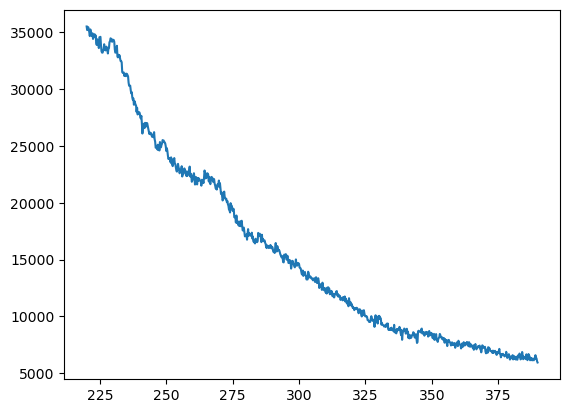

In [12]:
symreg.choose_data(65, 220, 390)
plt.plot(symreg.windowed_energy_loss_axis, symreg.single_eels_spectrum)
unary_operators = ["cos", "sin"]
binary_operators = ["+", "*", "^", '-']
symreg.define_model(iterations=1000, unary_operators=unary_operators, binary_operators=binary_operators)
symreg.train_model(interval=slice(0, -1))

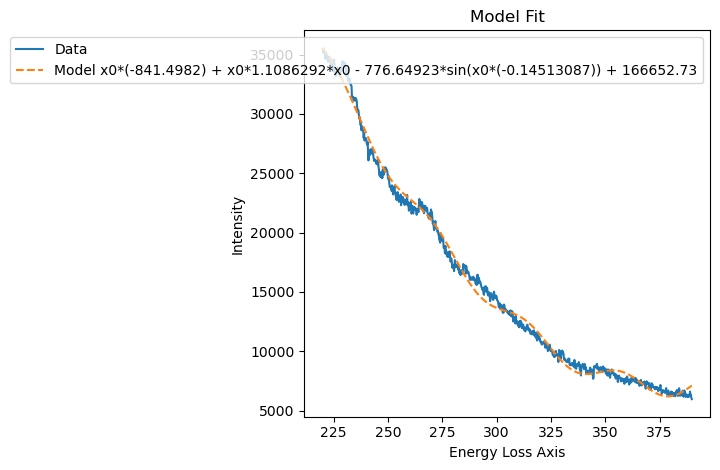

In [11]:
symreg.plot_model()